In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/VQI/darknet')

In [ ]:
path = os.getcwd()

In [ ]:
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
'''# get file with image names

f = open('infer_image_list.txt')
file = f.readlines()
file

['test.jpg\n', 'test2.jpg\n']

In [ ]:
'''file=[]
with open(('infer_image_list.txt'),'r') as fobj:
  for line in fobj:
    #print(line)
    file.append(line.rstrip("\n"))

file

['test.jpg', 'test2.jpg']

In [ ]:
#create sample file with 2 images
test_path = '/content/drive/My Drive/VQI/darknet/build/darknet/x64/data/'

file=[]
with open((test_path + 'test.txt'),'r') as fobj:
  for line in fobj:
    #print(line)
    file.append(line.rstrip("\n"))

file

['/content/drive/My Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/rolled-in_scale_237.jpg',
 '/content/drive/My Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/inclusion_259.jpg']

In [ ]:
!cat /content/drive/My\ Drive/VQI/darknet/build/darknet/x64/data/test.txt

/content/drive/My Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/rolled-in_scale_237.jpg
/content/drive/My Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/inclusion_259.jpg


In [ ]:
!cat /content/drive/My\ Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/rolled-in_scale_237.txt

None 0.615 0.225 0.4 0.21
None 0.647 0.625 0.455 0.54


In [ ]:
!cat /content/drive/My\ Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/inclusion_259.txt

1 0.738 0.56 0.155 0.83


In [ ]:
# initialize a list of colors to represent each possible class label
#import numpy as np
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(6, 3), dtype="uint8")
COLORS

array([[102, 220, 225],
       [ 95, 179,  61],
       [234, 203,  92],
       [  3,  98, 243],
       [ 14, 149, 245],
       [ 46, 106, 244]], dtype=uint8)

In [ ]:
# define the labels
LABELS = ['crazing','inclusion','patches','pitted_surface','rolled_in_scale','scratches']

/content/drive/My Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/rolled-in_scale_237.txt
83 24 163 66
83 71 174 179


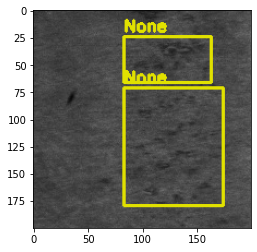

/content/drive/My Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/inclusion_259.txt
132 29 163 195


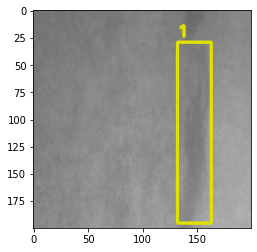

In [ ]:
# read GT & convert box coordinates to pixels

#import cv2
#from matplotlib import pyplot as plt

for f in file:
    image = cv2.imread(f)
    (H, W) = image.shape[:2]
    #print(H,W)
    #print(image)

    # read GT
    gt_file_name = f.split('.jpg')[0] + '.txt'
    print(gt_file_name)
    #plt.imshow(image)
    #print(image[0][0])

    gt_file=[]
    with open (gt_file_name,'r') as fobj:
        for line in fobj:
            gt_file.append(line.rstrip("\n"))
    fobj.close()
    
    # parse GT info
    for eachline in gt_file:
        det = eachline.rstrip("\n").split(" ")
        #print(det)
        # scale the bounding box coordinates back relative to the
        # size of the image, keeping in mind that YOLO actually
        # returns the center (x, y)-coordinates of the bounding
        # box followed by the boxes' width and height
        #box = det[1:4] * np.array([W, H, W, H])
        #(centerX, centerY, width, height) = box.astype("int")
        centerX = float(det[1]) * W
        centerY = float(det[2]) * H
        width = float(det[3]) * W
        height = float(det[4]) * H
        classId = det[0]

        # use the center (x, y)-coordinates to derive the top and
        # and left corner of the bounding box
        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))
        print(x,y,(x+int(width)),(y+int(height)))

        # draw a bounding box rectangle and label on the image
        #color = [int(c) for c in COLORS[classId]]
        #cv2.rectangle(image, (x, y), (x + int(width), y + int(height)), color, 2)
        cv2.rectangle(image, (x, y), (x + int(width), y + int(height)), [225,225,0], 2)
        #text = "{}: {:.4f}".format(LABELS[classId])
        #cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
        cv2.putText(image, classId, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, [225,225,0], 2)
        #plt.imshow(image)


    
    # show the output image
    #cv2.imshow("Image", image)  #cv2.imshow() is disabled in Colab, because it causes Jupyter sessions to crash;
    #plt.imshow(image)
    plt.figure(figsize=(4,4))  #12,16
    plt.imshow(image)
    plt.show()
    #out_img = out_path + name + file_no[j]
    #cv2.imwrite(out_img, image)

    


In [ ]:
# read pred, parse json & convert box coordinates to pixels

In [ ]:
path = os.getcwd()

In [ ]:
#import json

pred_file = path + '/pred_test_coord2.json'
with open(pred_file) as f:
  data = json.load(f)

In [ ]:
data

[{'filename': '/content/drive/My Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/rolled-in_scale_237.jpg',
  'frame_id': 1,
  'objects': []},
 {'filename': '/content/drive/My Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/inclusion_259.jpg',
  'frame_id': 2,
  'objects': [{'class_id': 1,
    'confidence': 0.992346,
    'name': 'inclusion',
    'relative_coordinates': {'center_x': 0.738225,
     'center_y': 0.509432,
     'height': 1.039224,
     'width': 0.191702}}]}]

In [ ]:
len(data)

2

In [ ]:
data[1]['objects']

[{'class_id': 1,
  'confidence': 0.992346,
  'name': 'inclusion',
  'relative_coordinates': {'center_x': 0.738225,
   'center_y': 0.509432,
   'height': 1.039224,
   'width': 0.191702}}]

/content/drive/My Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/rolled-in_scale_237.jpg
[]


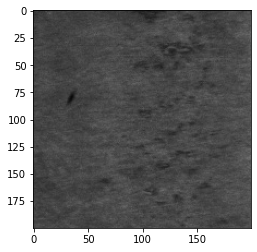

/content/drive/My Drive/VQI/darknet/build/darknet/x64/data/obj/Combined/inclusion_259.jpg
[{'class_id': 1, 'name': 'inclusion', 'relative_coordinates': {'center_x': 0.738225, 'center_y': 0.509432, 'width': 0.191702, 'height': 1.039224}, 'confidence': 0.992346}]
128 -2 166 205


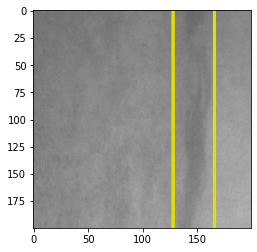

In [ ]:
for i in range(0,len(data)):
    filename = data[i]['filename']
    print(filename)
    print(data[i]['objects'])

    image = cv2.imread(filename)
    (H, W) = image.shape[:2]

    #for each filename & GT - correct here
    for j in range(0,len(data[i]['objects'])):
        classId = data[i]['objects'][j]['name']
        conf = data[i]['objects'][j]['confidence']
        centerX = data[i]['objects'][j]['relative_coordinates']['center_x'] * W
        centerY = data[i]['objects'][j]['relative_coordinates']['center_y'] * H
        width = data[i]['objects'][j]['relative_coordinates']['width'] * W
        height = data[i]['objects'][j]['relative_coordinates']['height'] * H
        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))
        print(x,y,(x+int(width)),(y+int(height)))

        # draw a bounding box rectangle and label on the image
        #color = [int(c) for c in COLORS[classId]]
        #cv2.rectangle(image, (x, y), (x + int(width), y + int(height)), color, 2)
        cv2.rectangle(image, (x, y), (x + int(width), y + int(height)), [225,225,0], 2)
        #text = "{}: {:.4f}".format(LABELS[classId])
        text = "{}: {:.4f}".format(classId, conf)
        #cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, [225,225,0], 2)
        #plt.imshow(image)
    
    plt.figure(figsize=(4,4))  #12,16
    plt.imshow(image)
    plt.show()
    